# 1. RNN model with unsync 1 recording

In [1]:
import pandas as pd
import numpy as np

file='../raw_data/1.0.3/training_data.csv'
df=pd.read_csv(file)
df.head()

,Patient ID,Recording locations:,Age,Sex,Height,Weight,Pregnancy status,Murmur,Murmur locations,Most audible location,...,Systolic murmur pitch,Systolic murmur quality,Diastolic murmur timing,Diastolic murmur shape,Diastolic murmur grading,Diastolic murmur pitch,Diastolic murmur quality,Outcome,Campaign,Additional ID
0,2530,AV+PV+TV+MV,Child,Female,98.0,15.9,False,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
1,9979,AV+PV+TV+MV,Child,Female,103.0,13.1,False,Present,AV+MV+PV+TV,TV,...,High,Harsh,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
2,9983,AV+PV+TV+MV,Child,Male,115.0,19.1,False,Unknown,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
3,13918,AV+PV+TV+MV,Child,Male,98.0,15.9,False,Present,TV,TV,...,Low,Blowing,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
4,14241,AV+PV+TV+MV,Child,Male,87.0,11.2,False,Present,AV+MV+PV+TV,PV,...,Low,Harsh,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN


In [2]:
def drop_duplicates(data):
    doublon=data[['Patient ID','Additional ID']].dropna()
    liste_couple=[]
    for i in range(len(doublon)):
        min_id=min(doublon.iloc[i]['Patient ID'],doublon.iloc[i]['Additional ID'])
        max_id=max(doublon.iloc[i]['Patient ID'],doublon.iloc[i]['Additional ID'])
        if [min_id,max_id] not in liste_couple:
            liste_couple.append([min_id,max_id])
    list_id_drop=np.array(liste_couple)[:,1]
    data_drop_dup=data[~data['Patient ID'].isin(list_id_drop)]
    return data_drop_dup

In [3]:
df_drop_dup=drop_duplicates(df)
df_drop_dup

,Patient ID,Recording locations:,Age,Sex,Height,Weight,Pregnancy status,Murmur,Murmur locations,Most audible location,...,Systolic murmur pitch,Systolic murmur quality,Diastolic murmur timing,Diastolic murmur shape,Diastolic murmur grading,Diastolic murmur pitch,Diastolic murmur quality,Outcome,Campaign,Additional ID
0,2530,AV+PV+TV+MV,Child,Female,98.0,15.9,False,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
1,9979,AV+PV+TV+MV,Child,Female,103.0,13.1,False,Present,AV+MV+PV+TV,TV,...,High,Harsh,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
2,9983,AV+PV+TV+MV,Child,Male,115.0,19.1,False,Unknown,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
3,13918,AV+PV+TV+MV,Child,Male,98.0,15.9,False,Present,TV,TV,...,Low,Blowing,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
4,14241,AV+PV+TV+MV,Child,Male,87.0,11.2,False,Present,AV+MV+PV+TV,PV,...,Low,Harsh,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,85340,AV+PV+TV+MV,Child,Male,105.0,16.6,False,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,CC2015,NaN
938,85341,AV+PV+TV+MV,Child,Male,92.0,15.2,False,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,CC2015,NaN
939,85343,AV+PV+TV+MV,Child,Female,97.0,13.5,False,Present,MV+TV,TV,...,Low,Blowing,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
940,85345,AV+PV,Child,Female,132.0,38.1,False,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,CC2015,NaN


In [4]:
ls=[]
for i in df_drop_dup.index:
    r=df_drop_dup.loc[i, 'Recording locations:'].split('+')
    l=np.random.choice(r)
    ls.append(l)

In [5]:
df_new=pd.DataFrame({'Patient_id': df_drop_dup['Patient ID'], 
                     'select': ls,
                     'audible': df_drop_dup['Most audible location']
                    })
df_new

,Patient_id,select,audible
0,2530,TV,NaN
1,9979,PV,TV
2,9983,MV,NaN
3,13918,TV,TV
4,14241,PV,PV
...,...,...,...
937,85340,MV,NaN
938,85341,TV,NaN
939,85343,PV,TV
940,85345,AV,NaN


In [6]:
df_new.audible.fillna(df_new.select, inplace=True)
df_new

,Patient_id,select,audible
0,2530,TV,TV
1,9979,PV,TV
2,9983,MV,MV
3,13918,TV,TV
4,14241,PV,PV
...,...,...,...
937,85340,MV,MV
938,85341,TV,TV
939,85343,PV,TV
940,85345,AV,AV


In [7]:
def load_npy(a,b):
    file=f"../raw_data/1.0.3/tmp_dir_2/{a}_{b}.npy"
    v=np.load(file)[0:6000]
    return v

la=[]
for i in df_new.index:
    la.append(load_npy(df_new.Patient_id[i], df_new.audible[i]))

In [8]:
X_rec=np.expand_dims(la, axis=-1)
X_rec.shape

(872, 6000, 1)

In [9]:
y_rec=df_drop_dup.Outcome.map({'Abnormal': 1, 'Normal': 0})
y_rec.shape

(872,)

In [10]:
from tensorflow.keras.layers import Masking, LSTM, Conv1D, Dense, MaxPool1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Recall

In [11]:
from sklearn.model_selection import train_test_split

X_rec_train, X_rec_test, y_rec_train, y_rec_test= train_test_split(X_rec, y_rec, test_size=0.3, random_state=1)

In [12]:
def create_model():
    model_rec=Sequential()
    model_rec.add(Masking(mask_value=-10, input_shape=(6000,1)))
    model_rec.add(Conv1D(24, kernel_size=15, strides=2, activation='relu'))
    model_rec.add(MaxPool1D(3, strides=2))
    model_rec.add(Conv1D(48, kernel_size=7, strides=2, activation='relu'))
    model_rec.add(MaxPool1D(3, strides=2))
    model_rec.add(Conv1D(96, kernel_size=7, strides=2, activation='relu'))
    model_rec.add(MaxPool1D(3, strides=2))
    model_rec.add(LSTM(units=20, return_sequences=True))
    model_rec.add(LSTM(units=20, return_sequences=True))
    model_rec.add(LSTM(units=20, return_sequences=True))
    model_rec.add(LSTM(units=20, return_sequences=True))
    model_rec.add(LSTM(units=20, return_sequences=False))
    model_rec.add(Dense(1, activation='sigmoid'))
    
    return model_rec

In [13]:
adam=Adam(learning_rate=0.0001)
model_1=create_model()
model_1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy', Recall()])

In [14]:
es=EarlyStopping(patience=30, restore_best_weights=True, monitor='val_recall')
history_1=model_1.fit(X_rec_train, y_rec_train, batch_size=32, epochs=150, validation_split=0.2, callbacks=[es])

Epoch 1/150


/Users/fabianlaw/.pyenv/versions/3.10.6/envs/circor/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]
2022-12-01 10:13:01.522680: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


16/16 [==============================] - 6s 126ms/step - loss: 0.6930 - accuracy: 0.4795 - recall: 1.0000 - val_loss: 0.6933 - val_accuracy: 0.4344 - val_recall: 1.0000
Epoch 2/150
16/16 [==============================] - 1s 73ms/step - loss: 0.6926 - accuracy: 0.5594 - recall: 0.5812 - val_loss: 0.6928 - val_accuracy: 0.5164 - val_recall: 0.2642
Epoch 3/150
16/16 [==============================] - 1s 71ms/step - loss: 0.6919 - accuracy: 0.5779 - recall: 0.4188 - val_loss: 0.6926 - val_accuracy: 0.5246 - val_recall: 0.2830
Epoch 4/150
16/16 [==============================] - 1s 72ms/step - loss: 0.6907 - accuracy: 0.5840 - recall: 0.5470 - val_loss: 0.6930 - val_accuracy: 0.5410 - val_recall: 0.4717
Epoch 5/150
16/16 [==============================] - 1s 73ms/step - loss: 0.6881 - accuracy: 0.5840 - recall: 0.5171 - val_loss: 0.6933 - val_accuracy: 0.5164 - val_recall: 0.3774
Epoch 6/150
16/16 [==============================] - 1s 74ms/step - loss: 0.6855 - accuracy: 0.5738 - recall: 0

16/16 [==============================] - 1s 76ms/step - loss: 0.6312 - accuracy: 0.6230 - recall: 0.3120 - val_loss: 0.7318 - val_accuracy: 0.5246 - val_recall: 0.4151
Epoch 47/150
16/16 [==============================] - 1s 76ms/step - loss: 0.6223 - accuracy: 0.6250 - recall: 0.4872 - val_loss: 0.7107 - val_accuracy: 0.5738 - val_recall: 0.3208
Epoch 48/150
16/16 [==============================] - 1s 76ms/step - loss: 0.6155 - accuracy: 0.6496 - recall: 0.4701 - val_loss: 0.7011 - val_accuracy: 0.5738 - val_recall: 0.3019
Epoch 49/150
16/16 [==============================] - 1s 76ms/step - loss: 0.6119 - accuracy: 0.6557 - recall: 0.5299 - val_loss: 0.7127 - val_accuracy: 0.5738 - val_recall: 0.3396
Epoch 50/150
16/16 [==============================] - 1s 78ms/step - loss: 0.6121 - accuracy: 0.6639 - recall: 0.4316 - val_loss: 0.7373 - val_accuracy: 0.5656 - val_recall: 0.3774
Epoch 51/150
16/16 [==============================] - 1s 76ms/step - loss: 0.6068 - accuracy: 0.6578 - recal

In [15]:
es.best_epoch

24

In [16]:
model_1.evaluate(X_rec_test, y_rec_test)

9/9 [==============================] - 0s 16ms/step - loss: 0.6547 - accuracy: 0.6183 - recall: 0.2321


[0.654662549495697, 0.6183205842971802, 0.2321428507566452]

In [17]:
def plot_loss_recall(history):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('Model loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylim(ymin=0, ymax=1)
    ax1.legend(['Train', 'Validation'], loc='best')
    ax1.grid(axis="x",linewidth=0.5)
    ax1.grid(axis="y",linewidth=0.5)    

    
    ax2.plot(history.history['recall'])
    ax2.plot(history.history['val_recall'])
    ax2.set_title('RECALL')
    ax2.set_ylabel('Recall')
    ax2.set_xlabel('Epoch')
    ax2.set_ylim(ymin=0, ymax=1)
    ax2.legend(['Train', 'Validation'], loc='best')
    ax2.grid(axis="x",linewidth=0.5)
    ax2.grid(axis="y",linewidth=0.5)    

    plt.show()

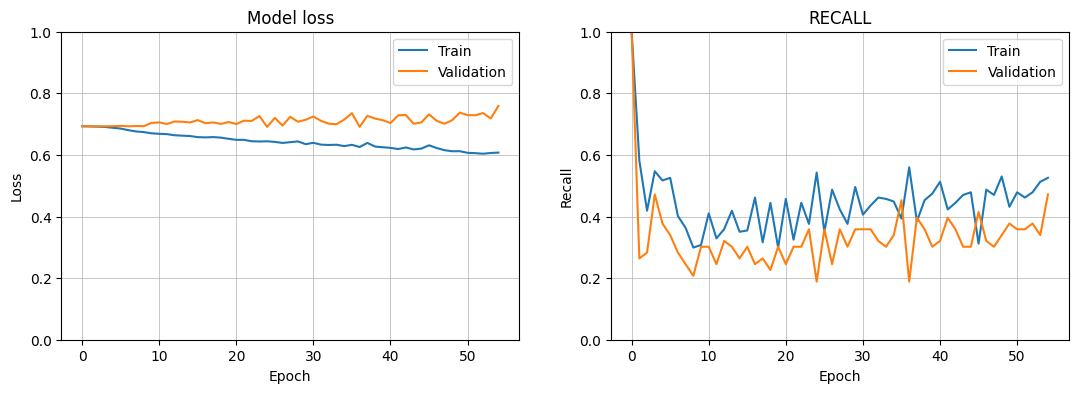

In [18]:
import matplotlib.pyplot as plt
plot_loss_recall(history_1)

In [19]:
y_pred=model_1.predict(X_rec_test)

9/9 [==============================] - 1s 15ms/step


In [20]:
y_pred.min()

0.28874755

In [21]:
y_pred.max()

0.83457714

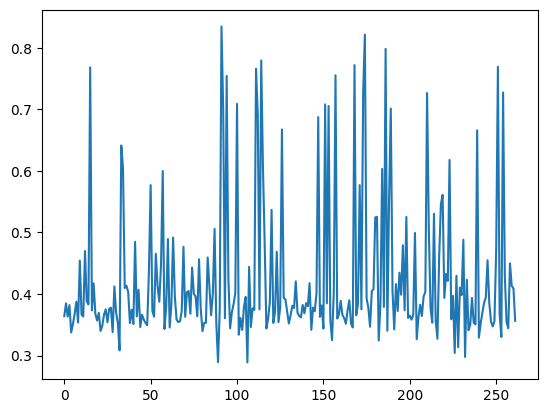

In [23]:

plt.plot(y_pred)